In [1]:
import stanza
stanza.download('en')  # English model for Stanza

import spacy
spacy.cli.download("en_core_web_sm")  # English model for Spacy


2024-06-12 21:16:29 INFO: Downloaded file to /Users/asadl/stanza_resources/resources.json
2024-06-12 21:16:29 INFO: Downloading default packages for language: en (English) ...
2024-06-12 21:16:31 INFO: File exists: /Users/asadl/stanza_resources/en/default.zip
2024-06-12 21:16:34 INFO: Finished downloading models and saved to /Users/asadl/stanza_resources


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import os

In [2]:
#FUNCTION TO OPEN AND READ CONTENT OF .TXT FILES IN DIRECTORY AND PUT INTO A LIST OF LISTS


def read_files(directory_path):
    """Function to read the contents of each .txt file in a directory into a list

    Args:
        directory_path (str) : File path of the directory where .txt files are stored 

    Returns:
        List[str]: A list of the contents of .txt files.
     
       """
    texts = []
    # List all files in the given directory that end with .txt
    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory_path, filename)
            # Open each file and read the contents
            with open(file_path, 'r', encoding='utf-8') as file:
                contents = file.read()
                texts.append(contents)
    return texts


200


In [ ]:
#TEST 

directory_path = '/Users/asadl/Desktop/dpproject/biblios'
bibliographies = read_files(directory_path)

print(len(bibliographies))

In [7]:

# Load SpaCy English model
spacy_nlp = spacy.load("en_core_web_sm")

# Initialize Stanza pipeline for English NER, without tokenization
stanza.download('en')
stanza_nlp = stanza.Pipeline(lang='en', processors='tokenize,ner', tokenize_pretokenized=True)


2024-06-12 21:40:04 INFO: Downloaded file to /Users/asadl/stanza_resources/resources.json
2024-06-12 21:40:04 INFO: Downloading default packages for language: en (English) ...
2024-06-12 21:40:05 INFO: File exists: /Users/asadl/stanza_resources/en/default.zip
2024-06-12 21:40:09 INFO: Finished downloading models and saved to /Users/asadl/stanza_resources
2024-06-12 21:40:09 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-06-12 21:40:09 INFO: Downloaded file to /Users/asadl/stanza_resources/resources.json
2024-06-12 21:40:09 INFO: Loading these models for language: en (English):
| Processor | Package                   |
-----------------------------------------
| tokenize  | combined                  |
| ner       | ontonotes-ww-multi_charlm |

2024-06-12 21:40:09 INFO: Using device: cpu
2024-06-12 21:40:09 INFO: Loading: tokenize
2024-06-12 21:40:09 INFO: Loading: ner
2024-06-12 21:40:10 INFO: Done loading processors!


In [16]:
#STANZA NER BUT FIRST USING SPACY TOKENIZER

def align_tokens_with_stanza(texts):
    """Uses SpaCy for tokenization and Stanza for NER on the tokenized input.
    
    Args:
        texts (list of str): List of document texts.

    Returns:
        list of lists: Each sublist contains tuples (entity_text, entity_type) for each document.
    """
    st_ner_results = []
    for text in texts:
        # Tokenize with SpaCy
        spacy_doc = spacy_nlp(text)
        # Rebuild text from tokens suitable for Stanza
        sp_tokens = [[token.text for token in sent] for sent in spacy_doc.sents]
        # Creating a document compatible with Stanza NER from SpaCy tokens
        # Process with Stanza NER
        processed_doc = stanza_nlp(sp_tokens)
        entities = [(ent.text, ent.type) for ent in processed_doc.ents]
        st_ner_results.append(entities)
    return st_ner_results





['Bernard Daniel Jacques Loiseau (French pronunciation: \u200b[bɛʁnaʁ danjɛl ʒak lwazo], 13 January 1951 – 24 February 2003) was a French chef at Le Relais Bernard Loiseau in Saulieu. He obtained his three stars in the Michelin Guide, and had a peak rating of 19.5/20 in the Gault Millau restaurant guide. He was one of the most mediatised French chefs between the 1980s and 1990s. In 2003, a short time after having become a member of the Relais & Châteaux association, Loiseau was downgraded from 19/20 to 17/20 in the Gault et Millau guide and received a strong negative media review from the gastronomic critic François Simon in the newspaper Le Figaro, but he still had his three stars in the Michelin Guide. As criticism continued to pour in and while the medias speculated about a possible future loss of a Michelin star, he died by suicide by self-inflicted gunshot without giving any explanation. The theories aiming at explaining his death are the object of strong polemics. His decision wa

In [26]:
#TEST
st_ner_results = align_tokens_with_stanza(bibliographies)
print(len(st_ner_results))

200


In [20]:
#SPACY NER RESULTS

def get_spacy_ner(texts):
    """Process a list of documents and return a list of lists of named entities for each document.
    
    Args:
        texts (list of str): A list containing the text of each document.

    Returns:
        list of lists: A list where each item is a list of tuples (entity_text, entity_type) for each document.
    """
    sp_ner_results = []
    for text in texts:
        doc = spacy_nlp(text)
        entities = []
        for ent in doc.ents:
            entities.append((ent.text, ent.label_))
        sp_ner_results.append(entities)
    return sp_ner_results


In [21]:
#TEST
sp_ner_results = get_spacy_ner(bibliographies)
print(sp_ner_results)

[[('Bernard Daniel Jacques Loiseau', 'PERSON'), ('French', 'NORP'), ('13 January 1951', 'DATE'), ('24 February 2003', 'DATE'), ('French', 'NORP'), ('Le Relais Bernard Loiseau', 'ORG'), ('Saulieu', 'LOC'), ('three', 'CARDINAL'), ('the Michelin Guide', 'ORG'), ('19.5/20', 'CARDINAL'), ('Gault Millau', 'ORG'), ('French', 'NORP'), ('between the 1980s and 1990s', 'DATE'), ('2003', 'DATE'), ('the Relais & Châteaux association', 'ORG'), ('Loiseau', 'PERSON'), ('19/20 to 17/20', 'CARDINAL'), ('Gault', 'ORG'), ('Millau', 'ORG'), ('François Simon', 'PERSON'), ('Le Figaro', 'FAC'), ('three', 'CARDINAL'), ('the Michelin Guide', 'ORG'), ('Michelin', 'PERSON')], [('Robert Earl Deen', 'PERSON'), ('April 28, 1970', 'DATE'), ('American', 'NORP'), ('second', 'ORDINAL'), ('Paula Deen', 'PERSON'), ('Jamie', 'PERSON'), ('The Lady & Sons', 'ORG'), ('Savannah', 'GPE'), ('Georgia', 'GPE'), ('Paula', 'PERSON'), ('Home Cooking', 'ORG'), ("Paula's Party", 'ORG')], [('Paul Desmond Scully-Power', 'PERSON'), ('May 

In [23]:
import pandas as pd

/Users/asadl/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [27]:
#PUTTING RESULTS INTO A DATAFRAME


# Example document texts or IDs (ensure this matches the number of documents processed)

# Create DataFrame
df = pd.DataFrame({
    'Document': bibliographies,
    'Spacy_Entities': sp_ner_results,
    'Stanza_Entities': st_ner_results
})

df.to_csv('NER-comp.csv', index=False)  # Save the first few rows to a CSV



                                            Document  \
0  Bernard Daniel Jacques Loiseau (French pronunc...   
1  Robert Earl Deen (born April 28, 1970) is an A...   
2  Paul Desmond Scully-Power, AM GOSE FRAeS (born...   
3  Joseph 'JJ' Johnson (born August 1, 1984) is a...   
4  William Barton Bridgeman (June 25, 1916 – Sept...   

                                      Spacy_Entities  \
0  [(Bernard Daniel Jacques Loiseau, PERSON), (Fr...   
1  [(Robert Earl Deen, PERSON), (April 28, 1970, ...   
2  [(Paul Desmond Scully-Power, PERSON), (May 28,...   
3  [(Joseph, PERSON), (Johnson, PERSON), (August ...   
4  [(William Barton Bridgeman, PERSON), (June 25,...   

                                     Stanza_Entities  
0  [(Bernard Daniel Jacques Loiseau, PERSON), (Fr...  
1  [(Robert Earl Deen, PERSON), (April 28 , 1970,...  
2  [(Paul Desmond, PERSON), (Scully - Power, ORG)...  
3  [(Joseph ' JJ ' Johnson, PERSON), (August 1 , ...  
4  [(William Barton Bridgeman, PERSON), (June 25 ..

In [28]:

df.to_csv('NER-comp.csv', index=False)  # Save the first few rows to a CSV

In [31]:
# now to comparison : first load csv file 

df = pd.read_csv('NER-comp.csv')


In [30]:
#adapt 'stringified lists' in the csv file. Lists in rows will be saved as strings so need to write code to fix this 

import ast

# Assuming entities are stored as stringified lists
df['Spacy_Entities'] = df['Spacy_Entities'].apply(ast.literal_eval)
df['Stanza_Entities'] = df['Stanza_Entities'].apply(ast.literal_eval)


In [34]:
# FGS the categories aren't labelled or ordered. Attempt to fix it :  # NEED TO FIX 

# Load the DataFrame from the CSV file
df = pd.read_csv('NER-comp.csv')

# Define a function to classify each bibliography based on keywords
def classify_bibliography(text):
    # Define keywords that might indicate the biography is about an astronaut
    astronaut_keywords = {'NASA', 'space', 'astronaut','cosmonaut','security','science'}
    # Define keywords that might indicate the biography is about a chef
    chef_keywords = {'chef', 'restaurant', 'kitchen', 'cooking','cook','cookbook','jolly','baker','cookery','cuisine'}

    # Convert text to lowercase to ensure case-insensitive matching
    text = text.lower()
    # Check if any astronaut keyword is in the text
    if any(keyword in text for keyword in astronaut_keywords):
        return 'Astronaut'
    # Check if any chef keyword is in the text
    elif any(keyword in text for keyword in chef_keywords):
        return 'Chef'
    else:
        return 'Unknown'  # Use 'Unknown' if no keywords match

# Apply the classification function to each row in the DataFrame
df['Category'] = df['Document'].apply(classify_bibliography)

# Check the first few entries to verify the new column
print(df.head())

# Save the updated DataFrame back to CSV if needed
df.to_csv('NER-comp-updated.csv', index=False)



                                            Document  \
0  Bernard Daniel Jacques Loiseau (French pronunc...   
1  Robert Earl Deen (born April 28, 1970) is an A...   
2  Paul Desmond Scully-Power, AM GOSE FRAeS (born...   
3  Joseph 'JJ' Johnson (born August 1, 1984) is a...   
4  William Barton Bridgeman (June 25, 1916 – Sept...   

                                      Spacy_Entities  \
0  [('Bernard Daniel Jacques Loiseau', 'PERSON'),...   
1  [('Robert Earl Deen', 'PERSON'), ('April 28, 1...   
2  [('Paul Desmond Scully-Power', 'PERSON'), ('Ma...   
3  [('Joseph', 'PERSON'), ('Johnson', 'PERSON'), ...   
4  [('William Barton Bridgeman', 'PERSON'), ('Jun...   

                                     Stanza_Entities   Category  
0  [('Bernard Daniel Jacques Loiseau', 'PERSON'),...       Chef  
1  [('Robert Earl Deen', 'PERSON'), ('April 28 , ...       Chef  
2  [('Paul Desmond', 'PERSON'), ('Scully - Power'...  Astronaut  
3  [("Joseph ' JJ ' Johnson", 'PERSON'), ('August...       Che

In [35]:
category_counts = df['Category'].value_counts()

# Print the counts
print(category_counts)

#FIX CATEGORY LABELS

Category
Astronaut    104
Chef          96
Name: count, dtype: int64


In [36]:

import ast
import matplotlib.pyplot as plt


In [37]:
# Load your DataFrame
df = pd.read_csv('NER-comp-updated.csv')

# Convert string representations of lists to actual lists (if saved as strings)
df['Spacy_Entities'] = df['Spacy_Entities'].apply(ast.literal_eval)
df['Stanza_Entities'] = df['Stanza_Entities'].apply(ast.literal_eval)

In [39]:
#function to calculate NE stats : 

def calculate_ne_stats(df, column):

    # Calculate the number of named entities
    df[f'{column}_Count'] = df[column].apply(len)
    # Group by category and calculate mean, min, and max
    stats = df.groupby('Category')[f'{column}_Count'].agg(['mean', 'min', 'max'])
    return stats


In [40]:
# apply the function :  # works but need to check if accurate 

spacy_stats = calculate_ne_stats(df, 'Spacy_Entities')
stanza_stats = calculate_ne_stats(df, 'Stanza_Entities')

print("SpaCy Named Entities Stats:")
print(spacy_stats)
print("\nStanza Named Entities Stats:")
print(stanza_stats)


SpaCy Named Entities Stats:
                mean  min  max
Category                      
Astronaut  19.788462    3  172
Chef       13.010417    2   55

Stanza Named Entities Stats:
                mean  min  max
Category                      
Astronaut  21.403846    3  176
Chef       13.666667    2   57


In [41]:
#calculate the average, minimum, and maximum number of words in each named entity, grouped by category and package.

def ne_words_stats(df, column):
    # Calculate the number of words in each named entity
    df[f'{column}_Words'] = df[column].apply(lambda ents: [len(ent[0].split()) for ent in ents])
    # Flatten the list of lists and then calculate mean, min, and max for each category
    words_stats = df.explode(f'{column}_Words').groupby('Category')[f'{column}_Words'].agg(['mean', 'min', 'max']).astype(float)
    return words_stats

spacy_words_stats = ne_words_stats(df, 'Spacy_Entities')
stanza_words_stats = ne_words_stats(df, 'Stanza_Entities')

print("SpaCy Words Stats:")
print(spacy_words_stats)
print("\nStanza Words Stats:")
print(stanza_words_stats)


SpaCy Words Stats:
               mean  min  max
Category                     
Astronaut  1.877551  1.0  9.0
Chef       1.778223  1.0  9.0

Stanza Words Stats:
               mean  min   max
Category                      
Astronaut  2.026954  1.0  17.0
Chef       1.986280  1.0  19.0


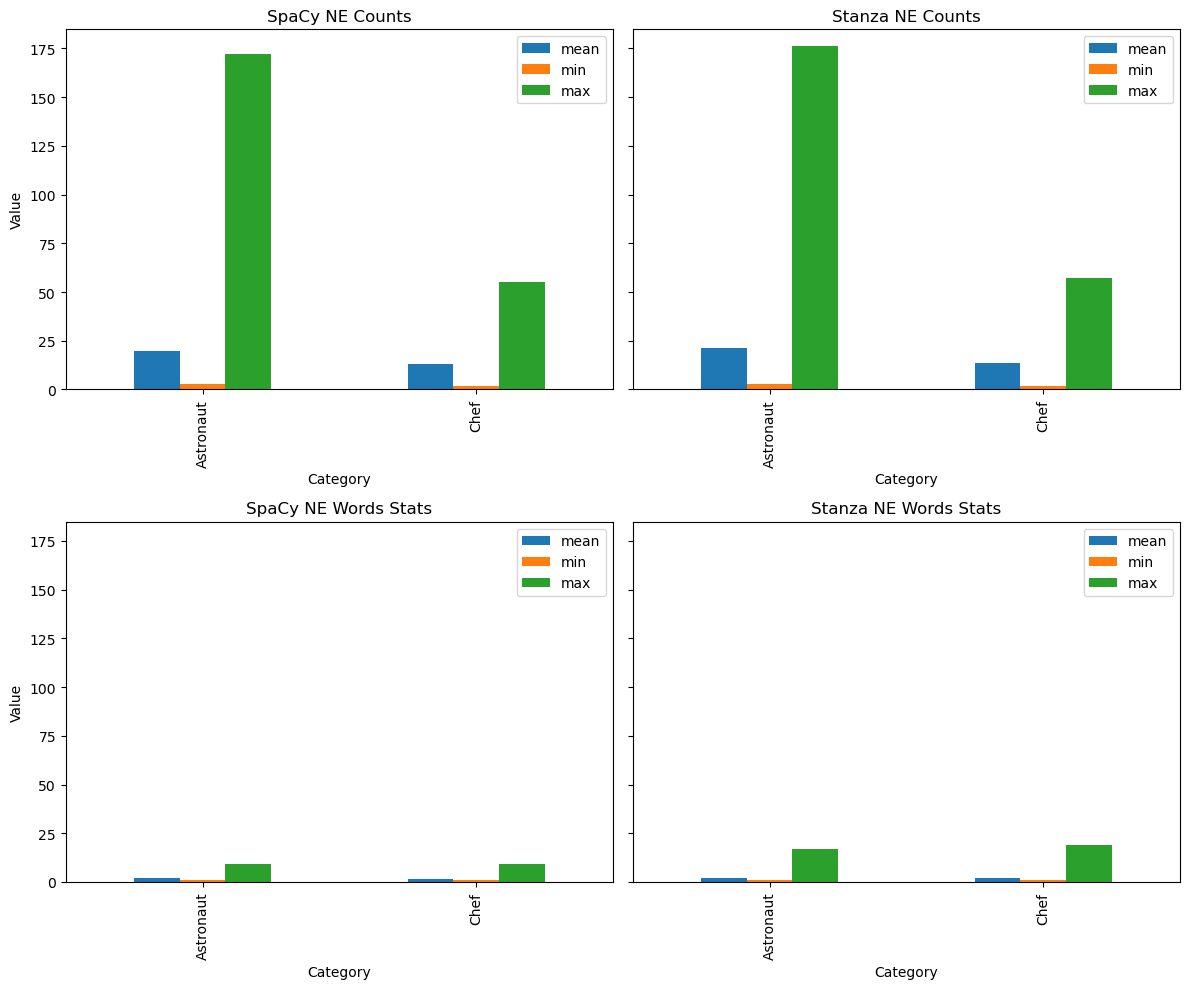

In [42]:
# VISUALIZATION 

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), sharey=True)

spacy_stats.plot.bar(ax=axs[0, 0], title='SpaCy NE Counts')
stanza_stats.plot.bar(ax=axs[0, 1], title='Stanza NE Counts')

spacy_words_stats.plot.bar(ax=axs[1, 0], title='SpaCy NE Words Stats')
stanza_words_stats.plot.bar(ax=axs[1, 1], title='Stanza NE Words Stats')

for ax in axs.flat:
    ax.set_xlabel('Category')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


#ADJUST SCALE ON NE WORDS STATS TO SEE BARS MORE CLEARLY .

In [ ]:
#Statiscal Analysis


def analyze_entities(df):
    # Calculate statistics for both Spacy and Stanza entities
    for label, column in [("Stanza", "Stanza_Entities"), ("Spacy", "Spacy_Entities")]:
        df[f"{label}_Num_Entities"] = df[column].apply(len)
        df[f"{label}_Avg_Ent_Length"] = df[column].apply(lambda x: np.mean([len(e[0].split()) for e in x]) if x else 0)
        
    # Calculate average, min, max
    stats = pd.DataFrame({
        "Average Number of Entities": df[[f"{label}_Num_Entities" for label in ["Stanza", "Spacy"]]].mean(),
        "Min Number of Entities": df[[f"{label}_Num_Entities" for label in ["Stanza", "Spacy"]]].min(),
        "Max Number of Entities": df[[f"{label}_Num_Entities" for label in ["Stanza", "Spacy"]]].max(),
        "Average Entity Length": df[[f"{label}_Avg_Ent_Length" for label in ["Stanza", "Spacy"]]].mean()
    })

    return stats

stats = analyze_entities(df)
print(stats)


In [ ]:
#Visualization 

import matplotlib.pyplot as plt

# Plotting number of entities
df.plot(kind='bar', y=[f"{label}_Num_Entities" for label in ["Stanza", "Spacy"]])
plt.title("Comparison of Number of Entities Detected")
plt.ylabel("Number of Entities")
plt.show()

# Plotting average entity length
df.plot(kind='bar', y=[f"{label}_Avg_Ent_Length" for label in ["Stanza", "Spacy"]])
plt.title("Comparison of Average Entity Length")
plt.ylabel("Average Number of Words")
plt.show()
